# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.261098e+01     1.379819e+01
 * time: 0.004723787307739258
     1     6.276620e+01     8.854677e+00
 * time: 0.013017892837524414
     2     5.561168e+01     1.139232e+01
 * time: 0.030242919921875
     3     4.168383e+01     8.310032e+00
 * time: 0.053955793380737305
     4     3.312572e+01     8.021121e+00
 * time: 0.16977596282958984
     5     1.360303e+01     2.932332e+00
 * time: 0.19359087944030762
     6     1.025486e+01     2.543440e+00
 * time: 0.210648775100708
     7     8.907223e+00     2.208291e+00
 * time: 0.2281179428100586
     8     8.320332e+00     5.072141e+00
 * time: 0.24162578582763672
     9     7.351573e+00     2.700618e+00
 * time: 0.2585299015045166
    10     6.598206e+00     2.368195e+00
 * time: 0.3358168601989746
    11     6.339081e+00     2.902562e+00
 * time: 0.3514828681945801
    12     5.995629e+00     1.931088e+00
 * time: 0.36597681045532227
    13     5.780708e+00     1.779238e+00
 * time: 0.38

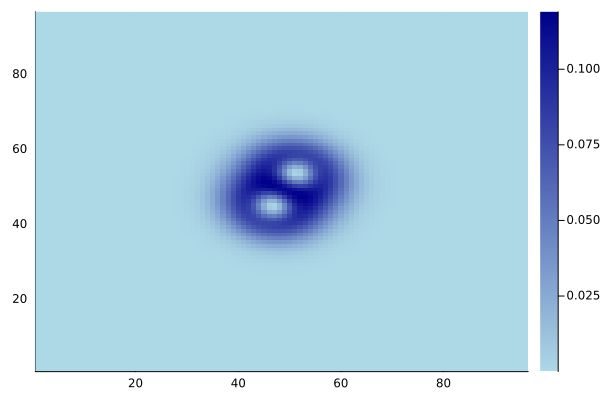

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)